In [5]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_to_zip_file = '/content/drive/My Drive/ngwl-predict-customer-churn.zip'
directory_to_extract_to = '/content/drive/My Drive'

## Читаем данные

Примечание: Использован агрегат от предыдущего запуска


In [24]:
data_train = pd.read_csv(os.path.join(directory_to_extract_to, 'data_train_items.csv'))

In [7]:
data_test = pd.read_csv(os.path.join(directory_to_extract_to, 'data_test_items.csv'))

In [13]:
bins = data_train.order_duration_time_min.quantile(q=np.arange(0, 1.1, 0.1)).to_list()
data_train.loc[:, 'order_duration_time_min_bin'] = pd.cut(data_train.order_duration_time_min, bins, duplicates='drop')
# f, ax = plt.subplots(figsize=(15, 4))
# sns.countplot(y='order_duration_time_min_bin', hue='target', data=data_train_full, palette='Blues_r').set_title('Распределение таргета по FEATURE');
# plt.show()

In [35]:
data_train.columns

Index(['total_cost_min', 'total_cost_max', 'total_cost_sum', 'total_cost_mean',
       'total_weight_min', 'total_weight_max', 'total_weight_sum',
       'total_weight_mean', 'order_duration_time_min',
       'order_duration_time_max', 'order_duration_time_sum',
       'order_duration_time_mean', 'shipment_duration_time_min',
       'shipment_duration_time_max', 'shipment_duration_time_sum',
       'order_time_min', 'order_time_max', 'order_time_sum', 'order_time_mean',
       'promo_total_min', 'promo_total_sum', 'rate_min', 'rate_max',
       'rate_mean', 'is_complete_sum', 'is_canceled_sum', 'is_web_max',
       'is_app_max', 'is_windows_max', 'is_linux_max', '('is_push', 'max')',
       '('is_email', 'max')', '('is_sms', 'max')', '('is_hidden', 'max')',
       '('is_sale', 'max')', 'target', 'phone_id', 'order_completed_at',
       'gender', 'age', 'city', 'price_min_min', 'price_min_max',
       'price_min_sum', 'price_min_mean', 'price_max_min', 'price_max_max',
       'price_max

In [42]:
data_train[["('is_email', 'max')", "('is_sms', 'max')", "('is_hidden', 'max')", "('is_sale', 'max')"]].agg(max)

('is_email', 'max')     1.0
('is_sms', 'max')       1.0
('is_hidden', 'max')    1.0
('is_sale', 'max')      1.0
dtype: float64

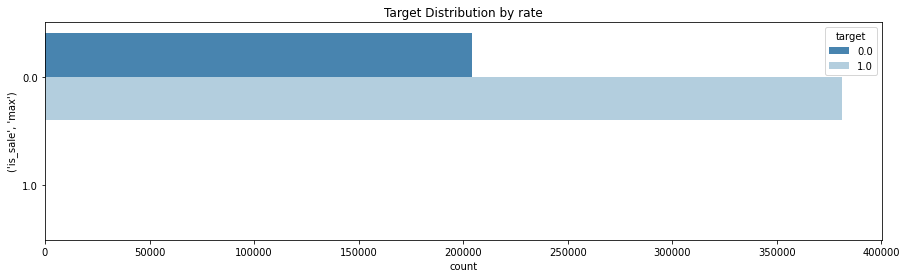

In [34]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="('is_sale', 'max')", hue='target', data=data_train, palette='Blues_r').set_title('Target Distribution by rate');
plt.show()

In [ ]:
gc.collect()

11

In [ ]:
# data_test_full.to_csv(os.path.join(directory_to_extract_to, 'data_test_city.csv'), header=True, index=False)

In [ ]:
# data_train_full.to_csv(os.path.join(directory_to_extract_to, 'data_train_city.csv'), header=True, index=False)